In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import ndimage
import json
import time
import os

# 模板

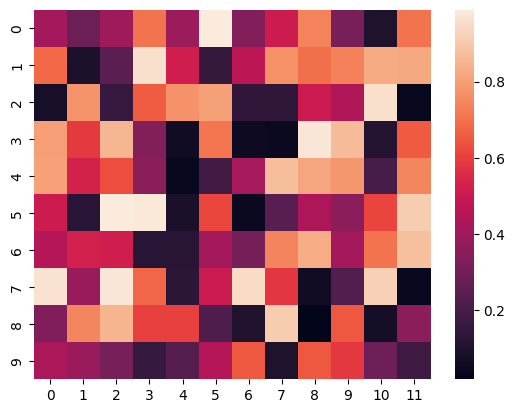

In [18]:
uniform_data = np.random.rand(10, 12)  # 自定义数据
ax = sns.heatmap(uniform_data)

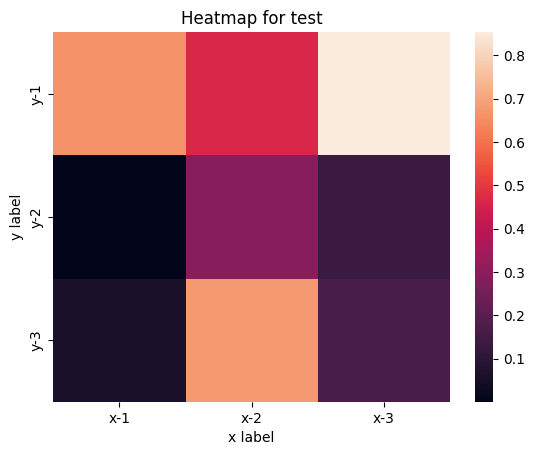

In [19]:
values = np.random.rand(3, 3)
x_ticks = ['x-1', 'x-2', 'x-3']
y_ticks = ['y-1', 'y-2', 'y-3']  # 自定义横纵轴
ax = sns.heatmap(values, xticklabels=x_ticks, yticklabels=y_ticks)
ax.set_title('Heatmap for test')  # 图标题
ax.set_xlabel('x label')  # x轴标题
ax.set_ylabel('y label')
plt.show()
figure = ax.get_figure()
# figure.savefig('sns_heatmap.jpg')  # 保存图片

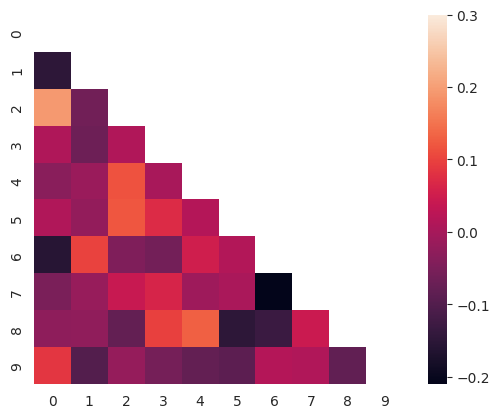

In [20]:
# 使用掩码，绘制部分数据
corr = np.corrcoef(np.random.randn(10, 200))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)


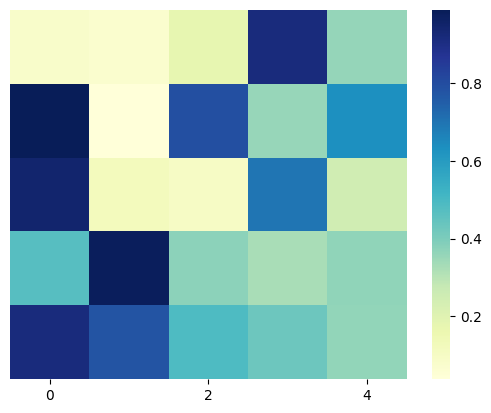

In [21]:
values = np.random.rand(5, 5)
ax = sns.heatmap(values, cmap="YlGnBu", xticklabels=2, yticklabels=False)  # x轴变2倍，隐藏y轴


# 实现

## 师兄的代码

In [22]:
class HeatMap:
    def __init__(self):
        # 根据时间生成随机数，保证每次都不一样
        np.random.seed(int(time.time()))
        self.fig, self.axes = plt.subplots()

    def plot_heatmap(self, img, heatmap):
        print("Image shape", img. shape)
        normalized_heat_map = self.get_heatmap_array(img, heatmap)
        # 去除坐标轴
        self.axes.cla()
        self.axes.imshow(img)
        self.axes.imshow(255 * normalized_heat_map, alpha=0.8, cmap="viridis")
        self.axes.set_axis_off()
        plt.show()

    def get_heatmap_array(self, img, heat):
        height, width, _ = img.shape
        heat[:, 0] *= height
        heat[:, 1] *= width
        x = np.zeros((height, width))

        def count_heat(i):
            try:
                x[int(i[0]), int(i[1])] += 1
            except:
                pass
        # 必选参数：func,axis,arr。其中func是我们自定义的一个函数，函数func(arr)中的arr是一个数组，函数的主要功能就是对数组里的每一个元素进行变换，得到目标的结果。其中axis表示函数func对数组arr作用的轴。
        np.apply_along_axis(count_heat, axis=1, arr=heat)
        heat_map = ndimage.gaussian_filter(x, sigma=18)
        # 归一化
        max_value = np.max(heat_map)
        min_value = np.min(heat_map)
        normalized_heat_map = (heat_map - min_value) / (max_value - min_value)
        return normalized_heat_map
    
    def get_json_file(self):
        current_work_dir = os.path.abspath(os.path.dirname(os.path.dirname(__file__)))
        json_path = os.path.join(current_work_dir, 'gaze.json')
        with open(json_path, 'r+') as f:
            data = json.load(f)
        gaze = np.asarray(data['direction'], dtype=np.float32)
        return gaze

NameError: name '__file__' is not defined

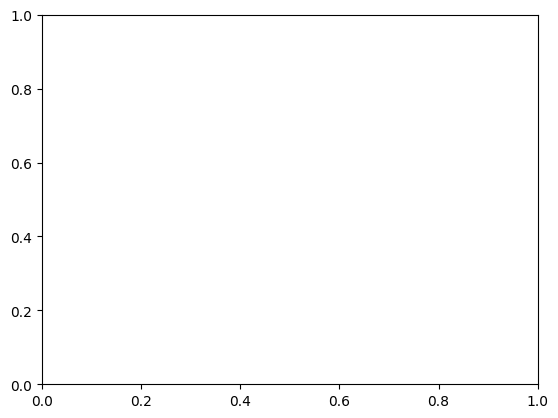

In [23]:
heatMap = HeatMap()
gaze = heatMap.get_json_file()